In [7]:
import matplotlib.pyplot as plt
import numpy as np
"""
#x = np.linspace(0, 10, 100)
x = np.linspace(0, 10, 10000).reshape(-1, 1)
y = np.sin(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Sine Wave', color='blue')
plt.title('Simple Sine Wave Plot')
plt.xlabel('X-axis (radians)')
plt.ylabel('Y-axis (amplitude)')
plt.legend()
plt.grid()
plt.show()
"""

"\n#x = np.linspace(0, 10, 100)\nx = np.linspace(0, 10, 10000).reshape(-1, 1)\ny = np.sin(x)\n\nplt.figure(figsize=(8, 4))\nplt.plot(x, y, label='Sine Wave', color='blue')\nplt.title('Simple Sine Wave Plot')\nplt.xlabel('X-axis (radians)')\nplt.ylabel('Y-axis (amplitude)')\nplt.legend()\nplt.grid()\nplt.show()\n"

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [9]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


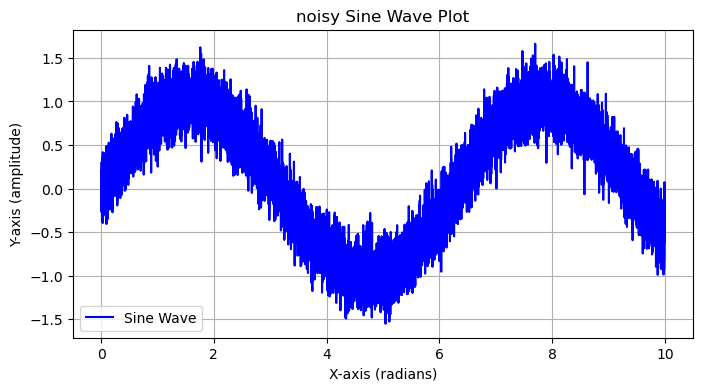

In [10]:
# New data with "noise"

x = np.linspace(0, 10, 10000).reshape(-1, 1)

y = np.sin(x)

# Add Gaussian noise
noise_mean = 0
noise_std = 0.2  # Standard deviation of noise
noise = np.random.normal(noise_mean, noise_std, size=x.shape)

y_noisy = y + noise

plt.figure(figsize=(8, 4))
plt.plot(x, y_noisy, label='Sine Wave', color='blue')
plt.title('noisy Sine Wave Plot')
plt.xlabel('X-axis (radians)')
plt.ylabel('Y-axis (amplitude)')
plt.legend()
plt.grid()
plt.show()


In [11]:
# convert to Pytorch sensors

x_tensor = torch.FloatTensor(x).view(-1, 1)
y_tensor = torch.FloatTensor(y).view(-1, 1)

In [12]:
# Define neural network
class SineWaveModel(nn.Module):
    def __init__(self):
        super(SineWaveModel, self).__init__()
        self.input_layer = nn.Linear(1, 128)  # Input layer to hidden layer
        self.hidden_layer2 = nn.Linear(128, 64)
        self.output_layer = nn.Linear(64, 1)  # Hidden layer to output layer
        self.activation = nn.Tanh()            # Activation function

    def forward(self, x):
        x = self.activation(self.input_layer(x))  # Apply hidden layer and activation
        x = self.activation(self.hidden_layer2(x))
        x = self.output_layer(x)                    # Apply output layer
        return x

In [13]:
# Train the model
# Initialize the model, loss function, and optimizer
model = SineWaveModel()
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Clear the gradients

    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)  # Compute the loss

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.1623
Epoch [200/1000], Loss: 0.0693
Epoch [300/1000], Loss: 0.0173
Epoch [400/1000], Loss: 0.0003
Epoch [500/1000], Loss: 0.0002
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000


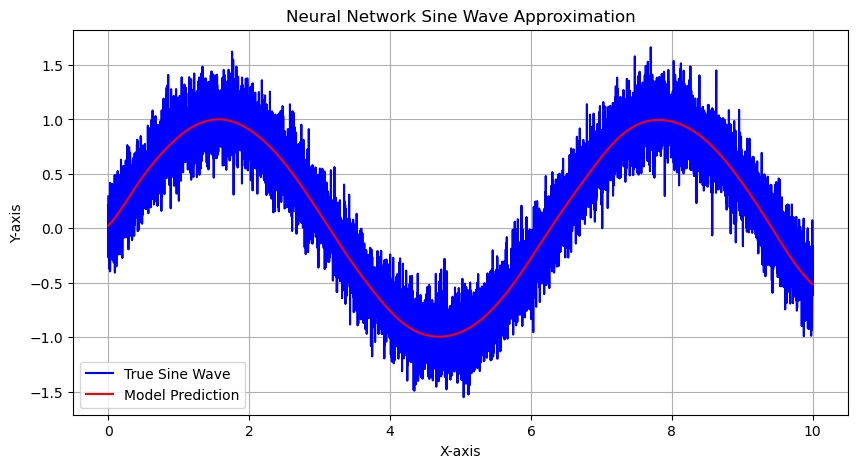

In [15]:
# Plotting
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predicted = model(x_tensor)

# Convert tensors to numpy arrays for plotting
x_np = x_tensor.numpy()
predicted_np = predicted.numpy()

plt.figure(figsize=(10, 5))
plt.plot(x_np, y_noisy, label='True Sine Wave', color='blue')
plt.plot(x_np, predicted_np, label='Model Prediction', color='red')
plt.title('Neural Network Sine Wave Approximation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

